# 微众银行外呼预测


## Step 1: 检视源数据集

In [1]:
import numpy as np
import pandas as pd
import os

#### 读入数据

* 数据已经事先导出为input

* 数据的第一列就是索引，而且两个input的索引不重复

In [31]:
data_F = pd.read_csv('../input1.csv', index_col=0)
data_S = pd.read_csv('../input2.csv', index_col=0)

#### 检视源数据

In [32]:
data_F.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
data_S.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


这时候大概心里可以有数，哪些地方需要人为的处理一下，以做到源数据更加好被process。

## Step 2: 合并数据

这么做主要是为了用DF进行数据预处理的时候更加方便。等所有的需要的预处理进行完之后，我们再把他们分隔开。

首先，CallAnswer作为我们的训练目标

我们先看一下*CallAnswer*均不均衡：

In [ ]:
#合并数据
all_df = pd.concat((data_F, data_S), axis=0)

In [ ]:
y_train = all_df.CallAnswer

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B075470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B0FF940>]], dtype=object)

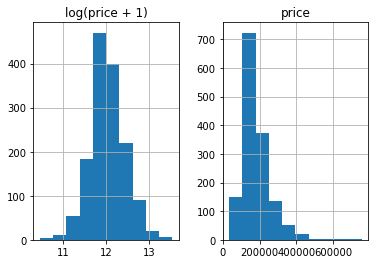

In [34]:
data_F.value_counts 

可见，CallAnswer本身并不均衡。为了我们分类器的学习更加准确，我们会首先处理CallAnswer的均衡问题

第一次时就miss掉，导致自己的结果总是达不到一定标准。

In [37]:
all_df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


此刻，我们可以看到all_df就是我们合在一起的DF

In [38]:
all_df.shape

(2919, 79)

而*y_train*则是*CallAnswer*那一列

In [39]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

## Step 3: 变量转化

类似『特征工程』。就是把不方便处理数据类型处理一下。

#### 正确化变量属性

首先，我们注意到，*MSSubClass* 的值其实应该是一个category，

但是Pandas是不会懂这些事儿的。使用DF的时候，这类数字符号会被默认记成数字。

这种东西就很有误导性，我们需要把它变回成*string*

In [40]:
all_df['MSSubClass'].dtypes

dtype('int64')

In [41]:
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)

变成*str*以后，做个统计，就很清楚了

In [42]:
all_df.shape

(2919, 79)

In [43]:
all_df['MSSubClass'].isnull().any()

False

In [44]:
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

#### 把category的变量转变成numerical表达形式

当我们用numerical来表达categorical的时候，要注意，数字本身有大小的含义，所以乱用数字会给之后的模型学习带来麻烦。于是我们可以用One-Hot的方法来表达category。

pandas自带的get_dummies方法，可以帮你一键做到One-Hot。

In [45]:
pd.get_dummies(all_df['MSSubClass'], prefix='MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


此刻*MSSubClass*被我们分成了12个column，每一个代表一个category。是就是1，不是就是0。

同理，我们把所有的category数据，都给One-Hot了

In [46]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [47]:
all_dummy_df.shape

(2919, 303)

#### 处理好numerical变量

就算是numerical的变量，也还会有一些小问题。

比如，有一些数据是缺失的：

In [48]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageArea        1
dtype: int64

可以看到，缺失最多的column是LotFrontage

处理这些缺失的信息时，询问过项目经理，

在这里，我们用平均值来填满这些空缺。

In [49]:
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [50]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [51]:
all_dummy_df.tail()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
2915,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0,0,0,1,0,0,0,0,1,0
2916,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,0,0,0,1,1,0,0,0,0,0
2917,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2918,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,1,0,0,0,0,1,0
2919,74.0,9627,7,5,1993,1994,94.0,758.0,0.0,238.0,...,0,0,0,1,0,0,0,0,1,0


看看是不是没有空缺了？

In [52]:
all_dummy_df.isnull().sum().sum()

0

#### 标准化numerical数据

这一步并不是必要，但是得看你想要用的分类器是什么。一般来说，不要让数据间的差距太大。

这里，我们当然不需要把One-Hot的那些0/1数据给标准化。我们的目标应该是那些本来就是numerical的数据：

先来看看 哪些是numerical的：

In [55]:
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [56]:
numeric_cols.shape

(35,)

计算标准分布：(X-X')/s

让我们的数据点更平滑，更便于计算。

In [25]:
numeric_col_means = all_dummy_df.loc[:, numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()
all_dummy_df.loc[:, numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

In [26]:
all_dummy_df.tail()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
2915,-2.266564,-1.043758,-1.481667,1.289537,-0.043338,-0.682695,-0.572152,-0.969026,-0.29308,-0.033614,...,0,0,0,1,0,0,0,0,1,0
2916,-2.266564,-1.049083,-1.481667,-0.507197,-0.043338,-0.682695,-0.572152,-0.415828,-0.29308,-0.607034,...,0,0,0,1,1,0,0,0,0,0
2917,4.255477,1.246594,-0.772420,1.289537,-0.373465,0.561660,-0.572152,1.717937,-0.29308,-1.276024,...,0,0,0,1,1,0,0,0,0,0
2918,-0.342796,0.034599,-0.772420,-0.507197,0.682939,0.370221,-0.572152,-0.229233,-0.29308,0.032375,...,0,0,0,1,0,0,0,0,1,0
2919,0.220258,-0.068608,0.646073,-0.507197,0.715952,0.465941,-0.045913,0.694959,-0.29308,-0.734460,...,0,0,0,1,0,0,0,0,1,0


## Step 4: 建立模型

#### 把数据集分成 训练/测试集

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(all_dummy_df.values,y_train.values)

In [29]:
train_X.tail()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1456,-0.342796,-0.285421,-0.063174,-0.507197,0.914028,0.753100,-0.572152,-0.969026,-0.293080,0.892505,...,0,0,0,1,0,0,0,0,1,0
1457,0.736390,0.381246,-0.063174,0.391170,0.220763,0.178782,0.094044,0.765207,0.670410,0.064232,...,0,0,0,1,0,0,0,0,1,0
1458,-0.155112,-0.142781,0.646073,3.086271,-1.000704,1.040259,-0.572152,-0.365338,-0.293080,0.719569,...,0,0,0,1,0,0,0,0,1,0
1459,-0.061269,-0.057197,-0.772420,0.391170,-0.703591,0.561660,-0.572152,-0.861460,5.789321,-1.276024,...,0,0,0,1,0,0,0,0,1,0
1460,0.267179,-0.029303,-0.772420,0.391170,-0.208401,-0.921995,-0.572152,0.853016,1.421105,-0.966559,...,0,0,0,1,0,0,0,0,1,0


In [30]:
train_X.shape, test_X.shape

((1460, 303), (1459, 303))

#### 过采样过程

由于数据量较少，最好采用过采样

In [ ]:
 from imblearn.over_sampling import SMOTE # 导入过采样处理库SMOTE

# 使用SMOTE方法进行过采样处理

smote = SMOTE() # 建立SMOTE模型对象

X_new, Y_new = smote.fit_sample(X_train.values, Y_test.values) # 输入数据并作过采样处理



#### logistic 

用logistic Regression模型来跑一遍看看。（对于不均衡的数据，这种模型可能效果很差）

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
Cs = [0.6,0.7,0.8,0.9,1.0,1.1,1.2]
test_scores = []
for C in Cs:
    clf = LogisticRegression(penalty=l2,C=C)
    test_score = cross_val_score(clf, X_train, y_train, cv=3, scoring='precision')
    test_scores.append(np.mean(test_score))

存下所有的CV值，看看哪个alpha值更好

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Cs, test_scores)

可见，大概C=1.1 的时候，可以把score达到0.96左右。

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = cross_val_score(clf, X_train, y_train, cv=3, scoring='precision')
    test_scores.append(np.mean(test_score))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Cs, test_scores)

可见，大概max_features=0.99 的时候，可以把score达到0.98左右,最终采用随机森林。

#### test分数

In [2]:
from sklearn.metrics import precision_score

In [4]:
precision_score?

In [ ]:
clf = RandomForestRegressor(n_estimators=200, max_features=0.99)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
score = precision_score(y_test,y_predict)

score达到0.95